# Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Loading Data

In [3]:
BTC_data_hours = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_hours.csv', parse_dates=True, index_col = 0)
BTC_data_days = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_days.csv', parse_dates=True, index_col = 0)
BTC_data_weeks = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_weeks.csv', parse_dates=True, index_col = 0)
BTC_data_months = pd.read_csv('../input/kernel-for-inputting-data/Imp1_BTC_data_months.csv', parse_dates=True, index_col = 0)

# ACF & PACF

In [56]:
series = {'Weekly':BTC_data_weeks,
          'Monthly':BTC_data_months}

In [57]:
def get_acf_pacf_plots(series, lags=range(25), diff_num = 0):
    fig = plt.figure(figsize=(18, 18))
    
    for series_name, ind in zip(series.keys(), range(1, 12, 2)):
        a = fig.add_subplot(6, 2, ind)
        plt.ylabel(series_name)
                
        if ind == 11:
            plt.xlabel('lags')
            
        if diff_num == 0:        
            plot_acf(series[series_name], ax=a, lags=lags)
        elif diff_num>0:
            diff = series[series_name].diff(diff_num)
            diff.dropna(inplace = True)
            plot_acf(diff, ax=a, lags=lags)
        
        if ind > 1:
            plt.title('')
        
    for series_name, ind in zip(series.keys(), range(2, 13, 2)):
        a = fig.add_subplot(6, 2, ind)
                
        if ind == 12:
            plt.xlabel('lags')
                
        if diff_num == 0:        
            plot_pacf(series[series_name], ax=a, lags=lags)
        elif diff_num>0:
            diff = series[series_name].diff(diff_num)
            diff.dropna(inplace = True)
            plot_pacf(diff, ax=a, lags=lags)
        
        if ind > 2:
            plt.title('')

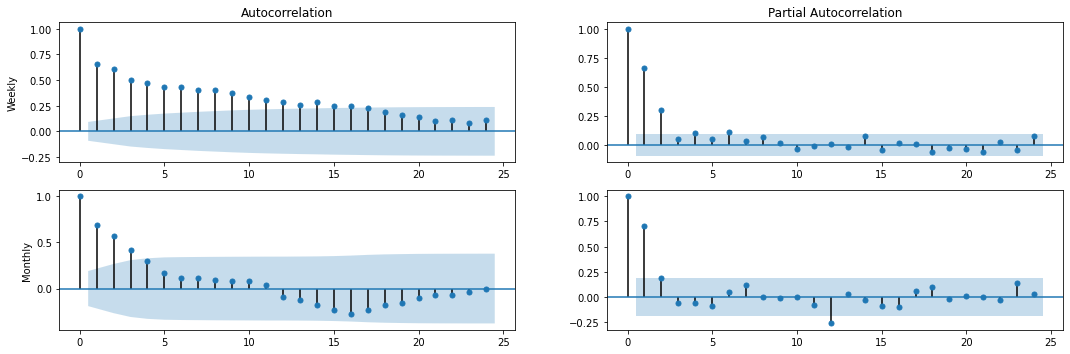

In [58]:
get_acf_pacf_plots(series)

The ACF shows a gradually decreasing trend while the PACF cuts immediately after 2 lags for weeks time series. AR(2)
The ACF shows a gradually decreasing trend while the PACF cuts immediately after 1 lag for months time series. AR(1)

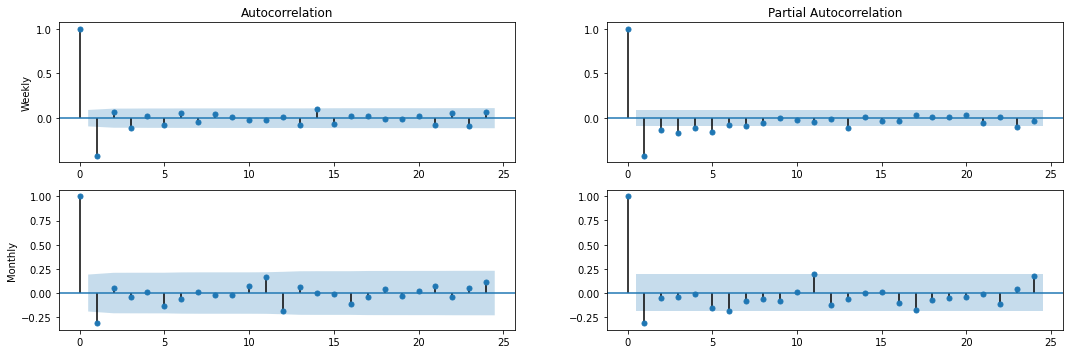

In [59]:
get_acf_pacf_plots(series, diff_num = 7)

In [54]:
diff = BTC_data_weeks.diff(1)

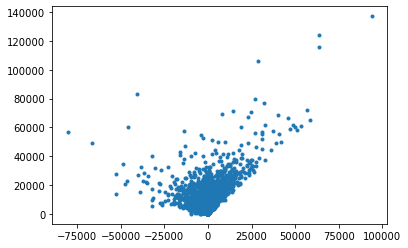

In [49]:
plt.plot(diff,BTC_data_days,'.')

In [50]:
import seaborn as sns

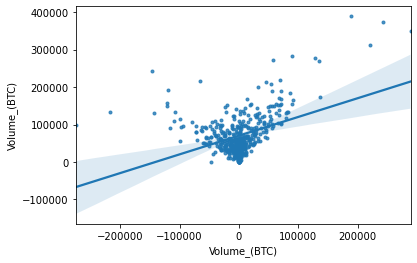

In [55]:
sns.regplot(x=diff,y=BTC_data_weeks,marker='.',order=1)

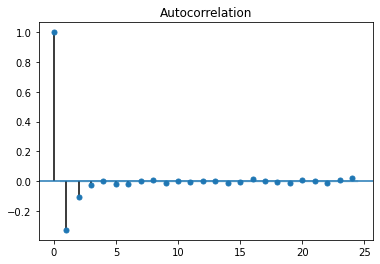

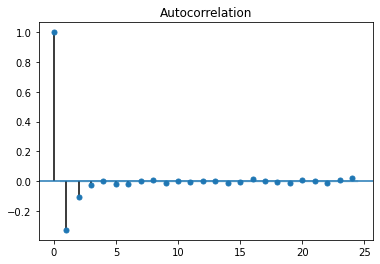

In [21]:
plot_acf(diff, lags=range(25))

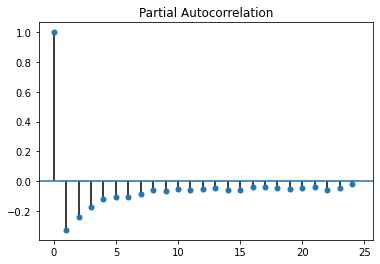

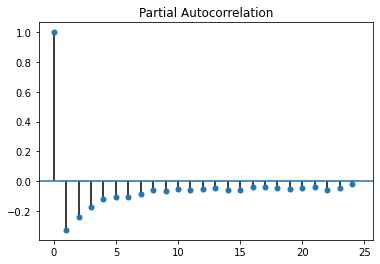

In [23]:
plot_pacf(diff, lags=range(25))